# 1 箱线图

box plot又称为盒须图（box-and-whisker plot），展示数据的集中趋势和离散情况的统计图表，主要显示数据的5个统计量：最小、下四分位数Q1，中位数，上四分位数Q3以及最大值

使用场景

- 多组定量数据的分布比较：例如学校间测试成绩的比较
- 质量控制：监控产品质量的一致性
- 人事测评：比较不同员工的绩效表现
- 数据分析：展示不同类别或时间段的数据分布

## 1.1 箱线图的组成部分

**箱体Box**：表示数据的四分位数（quartiles）

- Q3:上四分位数，数据中75%的值小于该值
- Q2:中位数，50%的数据小于该值
- Q1:下四分位数：25%的数据小于该值

**箱线的边界whiskers**：连接箱体和极值的线段，表示数据的非异常范围

- 上边缘upper whisker:是Q3 + 1.5 * IQR（指四分位距，箱体长度，IQR = Q3 - Q1）
- 下边缘lower whisker：是Q1 - 1.5 * IQR（指四分位距，箱体长度，IQR = Q3 - Q1）
- 异常值qutliers：超出上边缘和下边缘的点为离群点，通常标记为单独的点

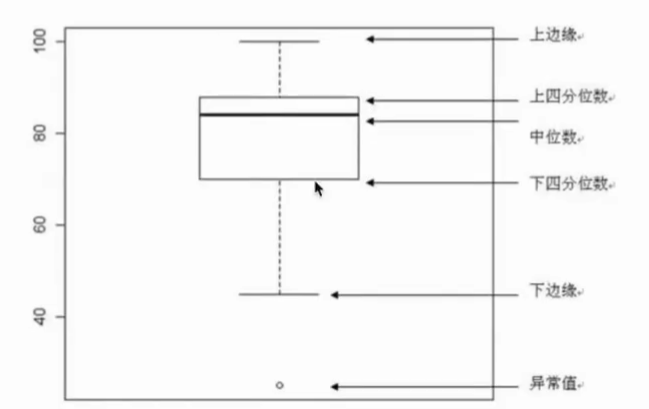

In [1]:
from IPython.display import Image
Image(filename='../picture/B-boxplot-1.png')

## 1.2 sns.boxplot箱线图的绘制


参数：

- data:数据源，DataFrame或类似结构
- x:x轴变量
- y:y轴变量
- hue:分类变量，数据按该变量分组，显示不同组别的比较
- pallette:调色板
- showmeans:是否标记均值
- meanprops:均值标记样式
- width:箱线图的宽度

## 1.3 箱线图案例

tips

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tip = sns.load_dataset('tips')
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1.3.1 基本箱线图


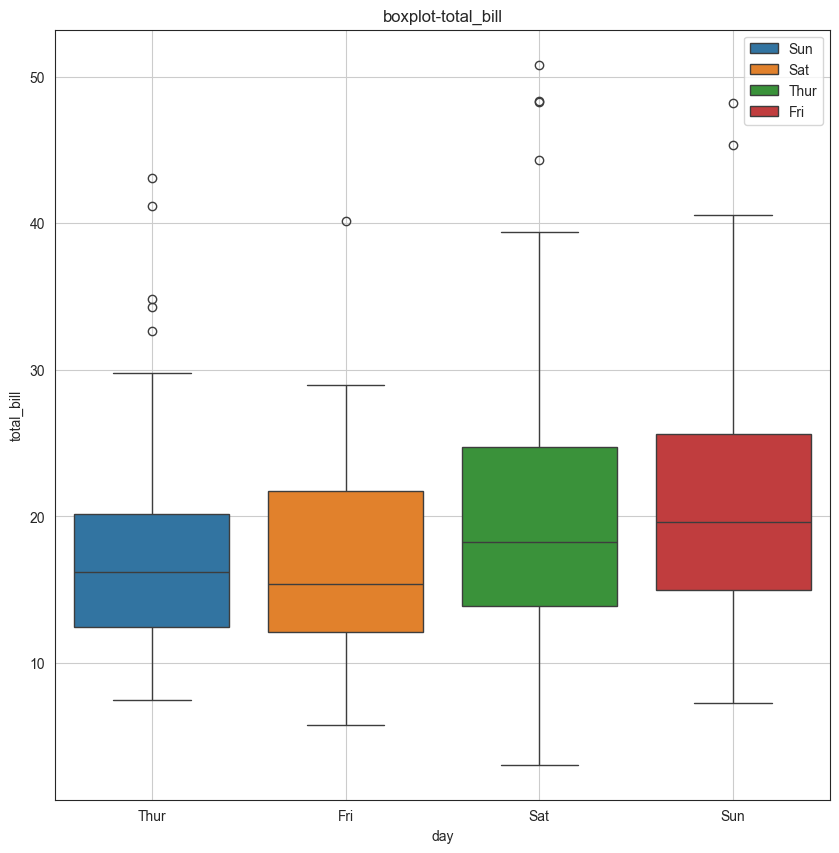

In [6]:
#
sns.set_style('white')

#
plt.figure(figsize=(10,10))

# 绘制单变量密度图

sns.boxplot(x='day', y='total_bill', data=tip)

#
plt.title('boxplot-total_bill')
plt.xlabel('day')
plt.ylabel('total_bill')

#
plt.legend(labels=tip.day.unique())
#
plt.grid(True)
plt.show()


### 1.3.2 hue分类变量

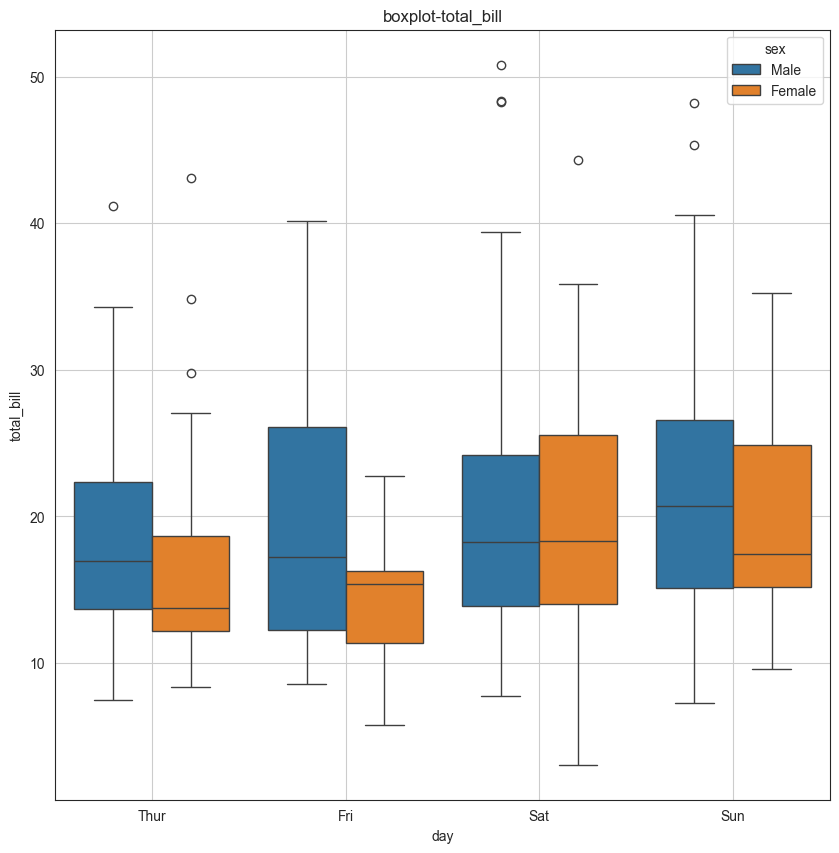

In [8]:
#
sns.set_style('white')

#
plt.figure(figsize=(10,10))

# 绘制单变量密度图

sns.boxplot(x='day', y='total_bill', data=tip,hue='sex')

#
plt.title('boxplot-total_bill')
plt.xlabel('day')
plt.ylabel('total_bill')

#
# plt.legend(labels=tip.day.unique())
#
plt.grid(True)
plt.show()

### 1.3.3 palette颜色参数

#### 1.3.3.1 常见颜色调色板palette介绍

colors=sns.color_palette("Set2")

**Qualitative Palettes**：适合离散的类别数据，颜色彼此之间没有顺序或关联

- deep:默认，适合大部分情况
- muted:颜色较柔和，适合多类别对比
- pastel:颜色柔和
- dark:深沉的颜色，适合整数图表
- colorblind：色盲友好，适合视觉障碍用户
- Set1，Set2，Set3，适合多个类别的颜色分配
- Paired：适合两两配对的颜色
- Accent：色调较鲜艳，适合强调特定类别


Sequential Paiettes：适合连续数据的颜色映射，从浅到深表示从大到小

![Sequential](../picture/B-pieplot-1.png)

![Sequential](../picture/B-pieplot-2.png)

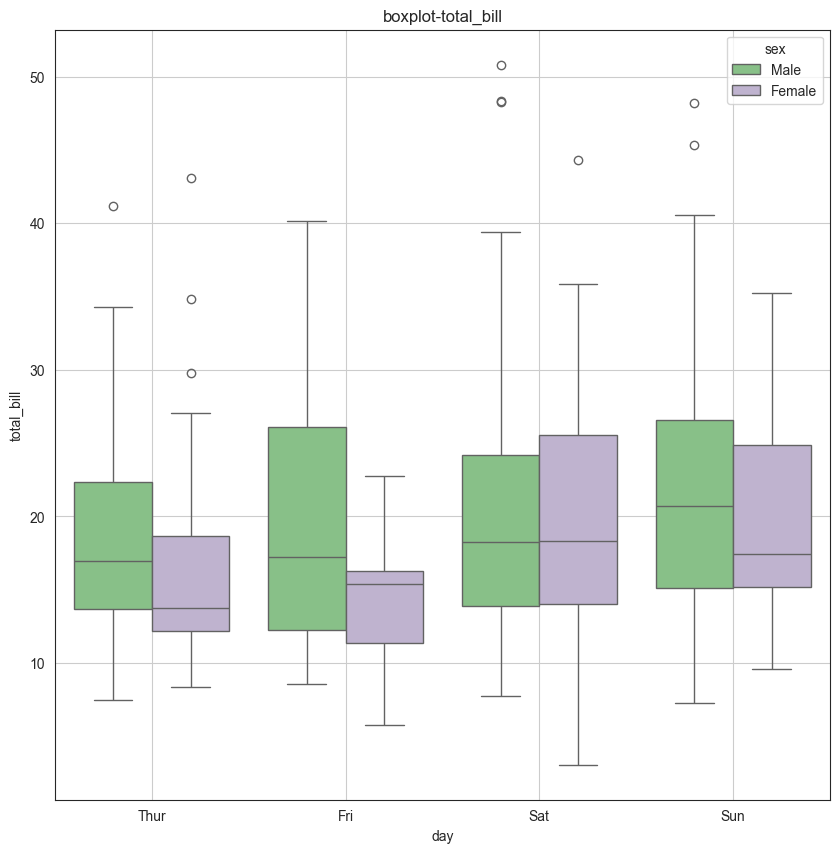

In [11]:
#
sns.set_style('white')

#
plt.figure(figsize=(10,10))

# 绘制单变量密度图

sns.boxplot(x='day', y='total_bill', data=tip,hue='sex',palette='Accent')
plt.title('boxplot-total_bill')
plt.xlabel('day')

#
plt.title('boxplot-total_bill')
plt.xlabel('day')
plt.ylabel('total_bill')

#
# plt.legend(labels=tip.day.unique())
#
plt.grid(True)
plt.show()

### 1.3.4 showmeans是否标记均值

标记均值的位置

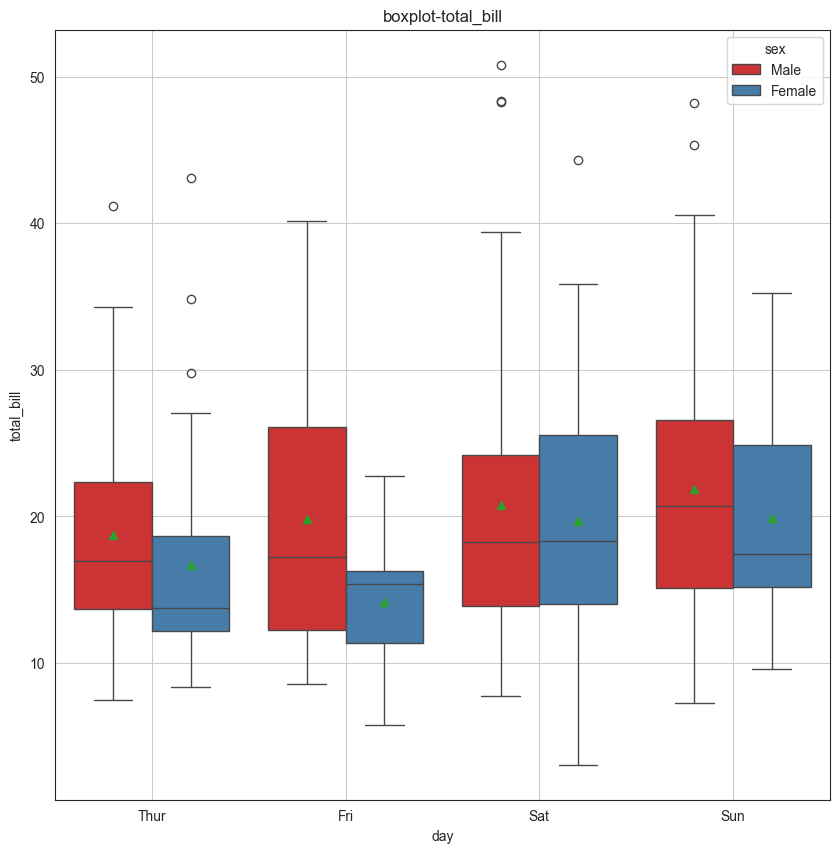

In [12]:
#
sns.set_style('white')

#
plt.figure(figsize=(10,10))

# 绘制单变量密度图

sns.boxplot(x='day', y='total_bill', data=tip,hue='sex',palette='Set1',showmeans=True)

#
plt.title('boxplot-total_bill')
plt.xlabel('day')
plt.ylabel('total_bill')

#
# plt.legend(labels=tip.day.unique())
#
plt.grid(True)
plt.show()

### 1.3.5 meanprops均值标记样式

通过字典进行传入

- marker:'o'圆点作为均值标记，'s'方形，'D'菱形，’^’三角形，‘p'五边形，’*‘星形，’H‘六边形，’X‘十字形，’+‘加号
- markerfacecolor:black，均值点填充颜色为黑色
- markeredgecolor：’red‘均值点的边框颜色为红色
- markersize：8，均值点大小


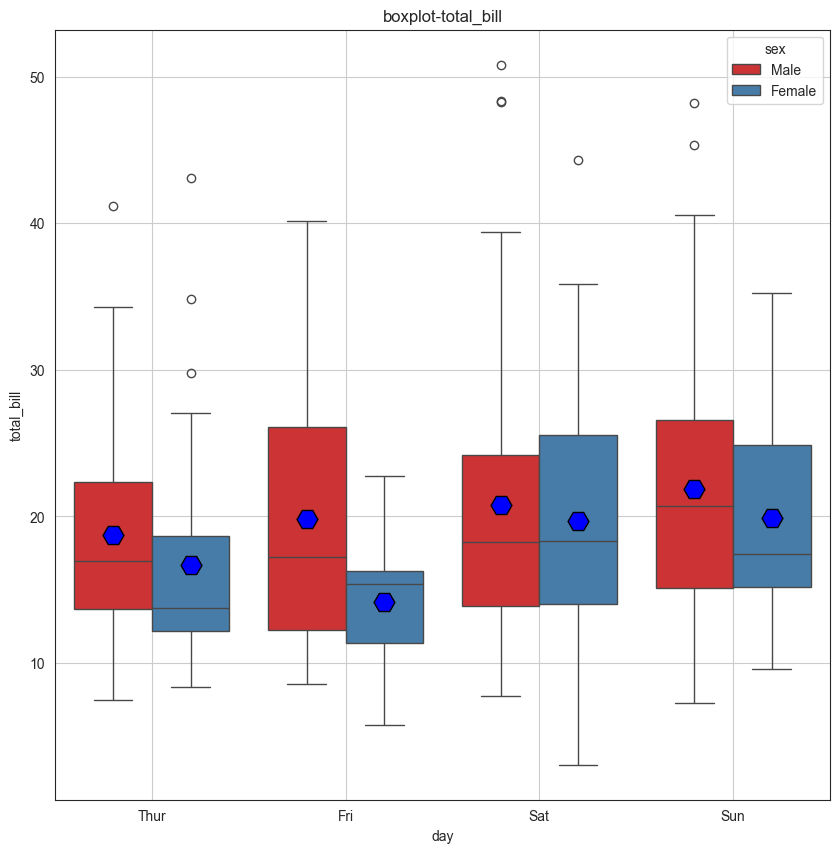

In [14]:
#
sns.set_style('white')

#
plt.figure(figsize=(10,10))

# 绘制单变量密度图

sns.boxplot(x='day', y='total_bill', data=tip,hue='sex',palette='Set1',showmeans=True,
            meanprops={
                'marker':'H',
                'markerfacecolor':'blue',
                'markeredgecolor':'black',
                'markersize':15})

#
plt.title('boxplot-total_bill')
plt.xlabel('day')
plt.ylabel('total_bill')

#
# plt.legend(labels=tip.day.unique())
#
plt.grid(True)
plt.show()

### 1.3.6 水平箱线图

原始代码不变，对换x，y轴变量

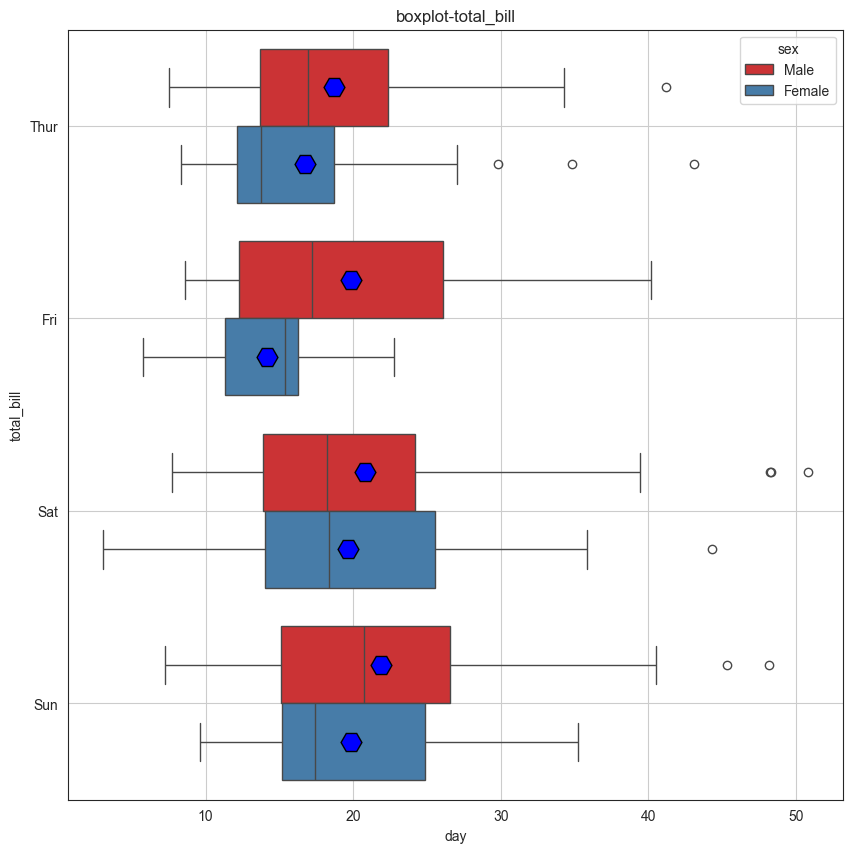

In [15]:
#
sns.set_style('white')

#
plt.figure(figsize=(10,10))

# 绘制单变量密度图

sns.boxplot(y='day', x='total_bill', data=tip,hue='sex',palette='Set1',showmeans=True,
            meanprops={
                'marker':'H',
                'markerfacecolor':'blue',
                'markeredgecolor':'black',
                'markersize':15})

#
plt.title('boxplot-total_bill')
plt.xlabel('day')
plt.ylabel('total_bill')

#
# plt.legend(labels=tip.day.unique())
#
plt.grid(True)
plt.show()